In [1]:
from PIL import Image
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import os

# dataset_root = "W:/DataSets/SIRST"

In [23]:
def sirst_iter(dataset_root):
    picts_ = os.listdir(dataset_root + '/images')
    picts, masks, xmls = [], [], []
    for i in picts_:
        if i.endswith('png'):
            picts.append(i)
            name = i.split('.png')[0]
            masks.append(name + '_pixels0.png')
            xmls.append(name + '.xml')
      
    for i in range(len(picts)):
        pict_path = dataset_root + '/images/' + picts[i]
        mask_path = dataset_root + '/masks/' + masks[i]
        # xml_path = dataset_root + '/masks/' + xmls[i]
        img = np.array(Image.open(pict_path).convert('L'))
        mask = np.array(Image.open(mask_path).convert('L'))
        # xml = 
        yield img, mask

In [25]:
sirst = sirst_iter(dataset_root)

i = 0
for img, mask in sirst:
    print(img.shape, mask.shape)
    i += 1
    if i > 10:
        break

(240, 320) (240, 320)
(240, 320) (240, 320)
(213, 332) (213, 332)
(282, 298) (282, 298)
(205, 308) (205, 308)
(230, 364) (230, 364)
(388, 418) (388, 418)
(215, 329) (215, 329)
(210, 306) (210, 306)
(220, 297) (220, 297)
(224, 315) (224, 315)


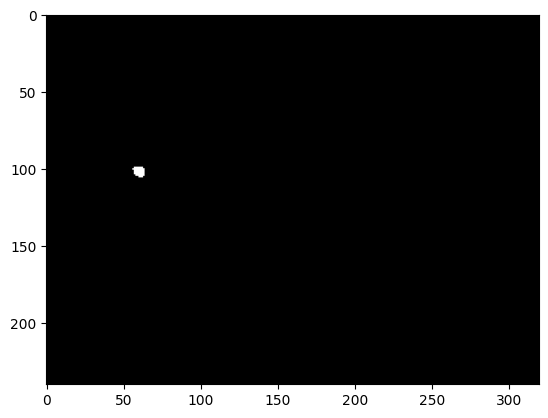

In [28]:
plt.imshow(pict, cmap='gray')
# plt.title('Blurred Image')
plt.show()

In [31]:
sigma = 1
# size = int(2 * np.ceil(3 * sigma) + 1)
size = 5
x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
g = np.exp(-((x**2 + y**2) / (2.0 * sigma**2)))
g /= g.sum()  # 归一化

# 对图像进行高斯滤波
blurred_image = convolve2d(pict, g, mode='same', boundary='fill', fillvalue=0)

In [ ]:
def gaussian_filter(image, sigma=1, kernel_size=None):
    """
    对图片应用高斯滤波。
    
    参数:
    image -- 输入的图像，应为NumPy数组形式。
    sigma -- 高斯函数的标准差，默认为1。
    kernel_size -- 高斯核的大小（边长，奇数）。默认情况下，根据sigma计算得到。
    """

    if kernel_size is None:
        # 如果没有指定kernel_size，则按照之前的逻辑计算
        kernel_size = int(2 * np.ceil(3 * sigma) + 1)
    else:
        # 确保kernel_size为奇数
        if kernel_size % 2 == 0:
            raise ValueError("kernel_size must be an odd number.")
    
    # 创建网格坐标系
    x, y = np.mgrid[-kernel_size//2 + 1:kernel_size//2 + 1, -kernel_size//2 + 1:kernel_size//2 + 1]
    # 计算二维高斯函数的值
    g = np.exp(-(x**2 + y**2) / (2.0 * sigma**2))
    # 归一化高斯核
    g /= g.sum()
    # 应用高斯滤波
    blurred_image = convolve2d(image, g, mode='same', boundary='fill', fillvalue=0)

    return blurred_image

In [4]:
import torch
import torchvision.transforms as transforms

In [34]:
pict = np.array(Image.open('W:/DataSets/SIRST/masks/Misc_10_pixels0.png').convert('L'))
pict = np.array((pict, np.array(Image.open('W:/DataSets/SIRST/images/Misc_10.png').convert('L'))))
pict = torch.from_numpy(pict)
# pict = torch.reshape(pict, (-1, *(pict.shape)))
print(pict.shape)

torch.Size([2, 240, 320])


In [46]:
b = img.unsqueeze(0)
print(b.shape)

torch.Size([1, 2, 224, 224])


In [2]:
from dataprocess.sirst import NUDTDataset, IRSTD1kDataset
import torch.utils.data as Data
import numpy as np

In [3]:
trainset = IRSTD1kDataset(base_dir=r'W:/DataSets/ISTD/IRSTD-1k', mode='train', mask_blurred=False, base_size=256)
train_data_loader = Data.DataLoader(trainset, batch_size=8, shuffle=False)

In [4]:
data_ = []
label_ = []
for i, (data, label) in enumerate(train_data_loader):
    data_.append(np.array(data))
    label_.append(np.array(label))
    if i>0:
        break
data = data_[0]
label = label_[0]

In [5]:
print(label.shape)

# 沿着轴0（垂直轴）找到每列的最大值索引
max_index_axis_0 = np.argmax(label[1,0], axis=0)
print("Max indices along axis 0:", max_index_axis_0)

# 沿着轴1（水平轴）找到每行的最大值索引
max_index_axis_1 = np.argmax(label[1,0], axis=1)
print("Max indices along axis 1:", max_index_axis_1)

(8, 1, 256, 256)
Max indices along axis 0: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 156 156 155   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 141 141   0 121
 121 122 122 121 121   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0

In [6]:
print(label[1,0,50:60,200:210])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


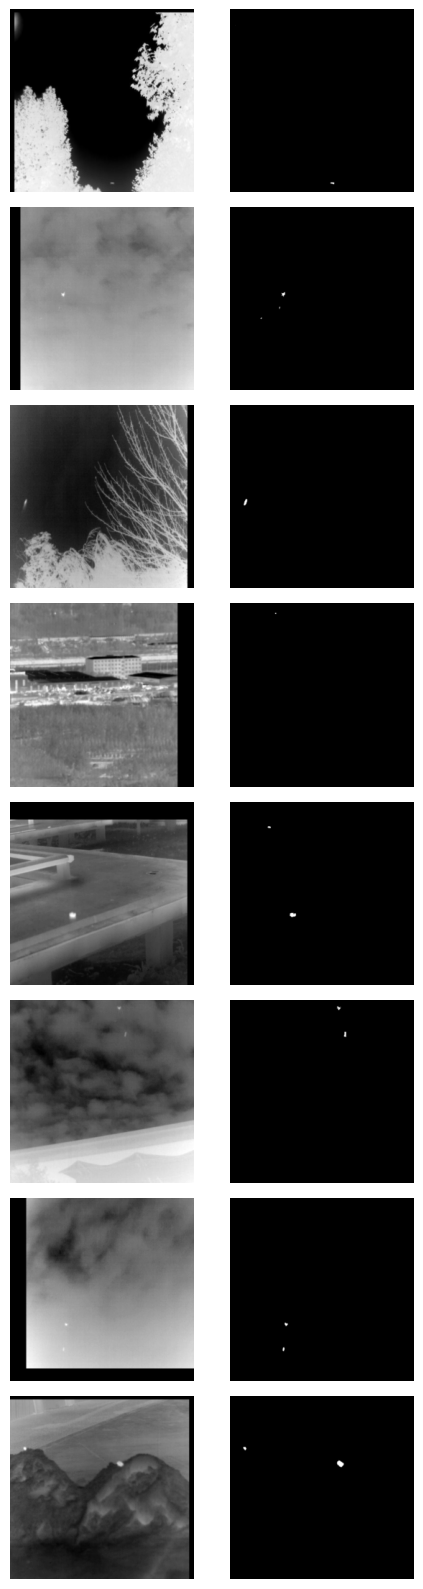

In [7]:
n = data.shape[0]  # 图片对的数量
shape = data.shape[-2:]

# 创建一个n行2列的子图网格
fig, axes = plt.subplots(n, 2, figsize=(5, 2*n))  # 调整figsize以适应你的需要

for i in range(n):
    
    # 在当前行的第一列显示第一张图片
    axes[i, 0].imshow(data[i].reshape(*shape), cmap='gray')
    axes[i, 0].axis('off')  # 关闭坐标轴显示
    
    # 在当前行的第二列显示第二张图片
    axes[i, 1].imshow(label[i].reshape(*shape), cmap='gray')
    axes[i, 1].axis('off')  # 同样关闭坐标轴显示

# 显示图表
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

In [8]:
label[0, 45:60, 50:80]

array([], shape=(0, 30, 256), dtype=float32)

In [5]:
a = (1*16 + 16*16*5 + 16*32 + 32*32 + 32*32 + 32*32 + 64*32 + 64*64 + 16*16+(16+32)*(16+32)+(32+32+16)*(32+32+16)+(64+32+32+16)*(64+32+16+32))*9 + 16*16+(16+32)*(16+32)+(32+32+16)*(32+32+16)+(64+32+16+32)*(64+32+16+32)
print(a)

396176


In [14]:
a = [1,2,3,4]
b = sum(a[-2:])
print(b)

7


In [30]:
import onnx

# 加载模型
model_path = "referenceNetwork\yolov8n-seg.onnx"
model = onnx.load(model_path)

# 为了获取节点的输出信息，我们需要遍历graph的节点和值信息（ValueInfoProto）
for node in model.graph.node:
    # 遍历每个节点的输出名
    for output_name in node.output:
        # 查找与输出名对应的ValueInfoProto对象以获取shape信息
        value_info = next((vi for vi in model.graph.value_info + model.graph.output if vi.name == output_name), None)
        if value_info is not None:
            # 打印节点名称和对应的输出shape
            shape_str = ', '.join(str(dim.dim_value) for dim in value_info.type.tensor_type.shape.dim)
            print(f"Node: {node.name if node.name else 'Unnamed Node'}, Output: {output_name}, Shape: {shape_str}")
        else:
            # 如果在value_info和output中都找不到对应的输出名，可能是因为该模型没有提供详细的输出信息
            print(f"Node: {node.name if node.name else 'Unnamed Node'}, Output: {output_name}, Shape information not available in model metadata.")

TypeError: unsupported operand type(s) for +: 'google.protobuf.pyext._message.RepeatedCompositeContainer' and 'google.protobuf.pyext._message.RepeatedCompositeContainer'

In [1]:
import os.path as osp
import yaml

cfg = {'c': 32}

In [4]:
file_path = osp.join('result/test', 'cfg.yaml')

with open(file_path, 'w', encoding='utf-8') as file:
            yaml.dump(cfg, file, allow_unicode=True)

In [3]:
from net.basenet import BaseNet2
import yaml

cfg_path = 'cfg.yaml'
with open(cfg_path) as f:
    cfg = yaml.safe_load(f)

In [4]:
model = BaseNet2(1, cfg)

total_params = sum(p.numel() for p in model.parameters())

print(f'Total number of parameters: {total_params}')

Total number of parameters: 523409
